In [31]:
from matplotlib import rcParams, pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import simplefilter
import random

In [32]:
train = pd.read_csv('.\\data\\train.csv', index_col=0)

In [33]:
train.head()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   u          320000 non-null  float64
 1   g          320000 non-null  float64
 2   r          320000 non-null  float64
 3   i          320000 non-null  float64
 4   z          320000 non-null  float64
 5   redshift   320000 non-null  float64
 6   dered_u    320000 non-null  float64
 7   dered_g    320000 non-null  float64
 8   dered_r    320000 non-null  float64
 9   dered_i    320000 non-null  float64
 10  dered_z    320000 non-null  float64
 11  nObserve   320000 non-null  int64  
 12  nDetect    320000 non-null  int64  
 13  airmass_u  320000 non-null  float64
 14  airmass_g  320000 non-null  float64
 15  airmass_r  320000 non-null  float64
 16  airmass_i  320000 non-null  float64
 17  airmass_z  320000 non-null  float64
 18  class      320000 non-null  int64  
dtypes: float64(16), int64(3

In [45]:
train.fillna(0, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   u          320000 non-null  float64
 1   g          320000 non-null  float64
 2   r          320000 non-null  float64
 3   i          320000 non-null  float64
 4   z          320000 non-null  float64
 5   redshift   320000 non-null  float64
 6   dered_u    320000 non-null  float64
 7   dered_g    320000 non-null  float64
 8   dered_r    320000 non-null  float64
 9   dered_i    320000 non-null  float64
 10  dered_z    320000 non-null  float64
 11  nObserve   320000 non-null  int64  
 12  nDetect    320000 non-null  int64  
 13  airmass_u  320000 non-null  float64
 14  airmass_g  320000 non-null  float64
 15  airmass_r  320000 non-null  float64
 16  airmass_i  320000 non-null  float64
 17  airmass_z  320000 non-null  float64
 18  class      320000 non-null  int64  
dtypes: float64(16), int64(3

위의 결과를 통해 대회에서 사용하는 데이터 셋에는 결측값이 없으며, 독립변수를 포함만 19개의 변수가 전부 수치형 변수인 것을 확인할 수 있습니다.

In [36]:
train.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000
mean,19.852429,18.376837,17.735761,17.174226,16.875187,0.058308,19.628874,18.227087,17.615434,17.152347,16.869277,6.332700,6.138816,1.175763,1.176528,1.175131,1.175430,1.176128,1.116322
std,1.945548,31.110759,1.466242,52.561464,57.146264,0.575457,1.923586,17.786568,1.473020,25.075760,35.436549,8.881129,8.551634,0.116297,0.118065,0.114723,0.115485,0.117156,0.923455
min,-17.687512,-17555.365606,7.731354,-23955.817764,-23955.817764,-166.048260,-42.837530,-9999.000000,-16.380230,-9999.000000,-9999.000000,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027,0.000000
25%,18.724150,17.474851,16.877190,16.523876,16.288890,0.000036,18.563598,17.348370,16.787138,16.453048,16.234063,1.000000,1.000000,1.088220,1.088448,1.087763,1.088021,1.088299,0.000000
50%,19.419439,18.140528,17.525850,17.149736,16.917610,0.047129,19.264635,18.022410,17.443415,17.087370,16.869390,2.000000,2.000000,1.179350,1.179235,1.179375,1.179377,1.179303,1.000000
75%,20.432092,19.073172,18.428089,18.007435,17.728924,0.094597,20.197603,18.888443,18.291078,17.906960,17.655653,5.000000,5.000000,1.227540,1.225990,1.229236,1.228599,1.226757,2.000000
max,58.623328,46.338272,72.009662,50.164052,52.612664,62.323343,30.777850,30.613170,31.957200,32.016220,30.781270,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390,2.000000


In [37]:
target_col = 'class'

In [46]:
num_col = [x for x in train.columns if train[x].dtype in [np.int64, np.float64] and x != target_col]
sel_num_col = random.sample(num_col, 3)
pred_col = 'pred'
sel_num_col

['r', 'g', 'u']

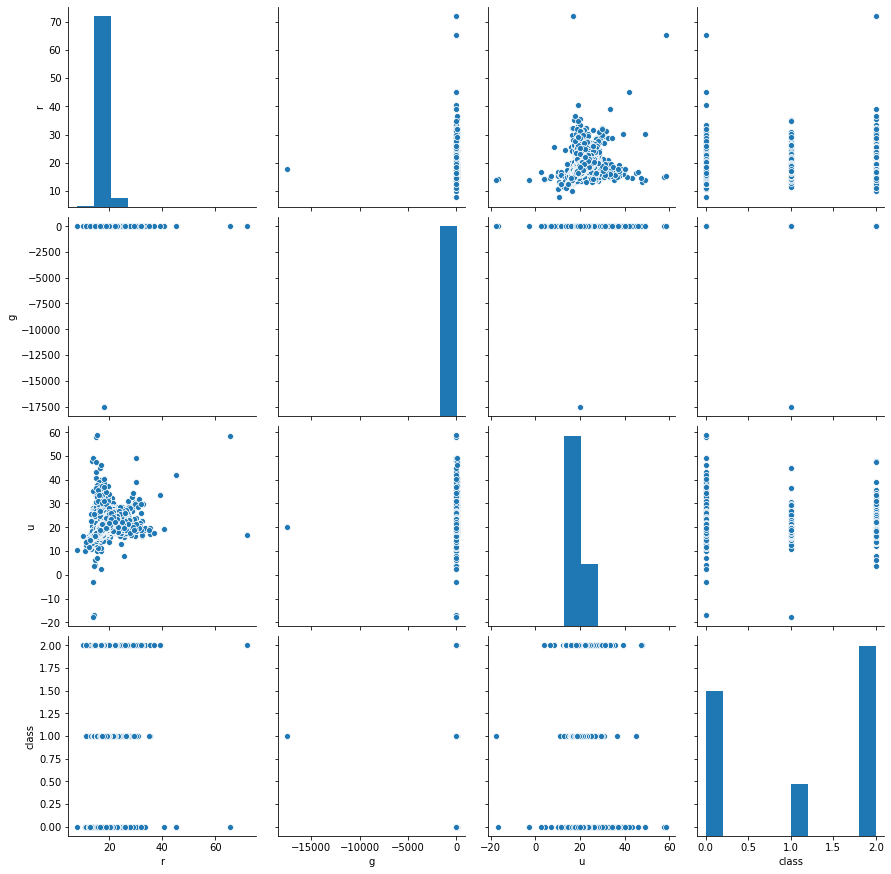

In [47]:
sns.pairplot(data=train, vars=sel_num_col + [target_col], height=3)

In [48]:
train.corr().style.background_gradient()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
u,1.000000,0.048621,0.818125,0.017466,0.014199,-0.009243,0.935217,0.081037,0.782799,0.034951,0.021438,0.227273,0.221087,0.076302,0.076066,0.076441,0.076385,0.076197,-0.379313
g,0.048621,1.000000,0.049739,0.591288,0.543726,-0.000360,0.046967,0.998955,0.048157,0.707392,0.500364,0.011722,0.011415,0.001999,0.001934,0.002064,0.002032,0.001967,-0.019501
r,0.818125,0.049739,1.000000,0.022797,0.019127,-0.006304,0.805675,0.085505,0.969504,0.047424,0.030600,0.205900,0.195569,0.076337,0.075987,0.076592,0.076478,0.076175,-0.374905
i,0.017466,0.591288,0.022797,1.000000,0.919717,-0.000152,0.017510,0.590351,0.022486,0.987939,0.699012,0.005619,0.005580,-0.000755,-0.000829,-0.000679,-0.000718,-0.000792,-0.010138
z,0.014199,0.543726,0.019127,0.919717,1.000000,-0.000164,0.014029,0.542776,0.018913,0.908595,0.918965,0.005214,0.005192,-0.001465,-0.001521,-0.001406,-0.001436,-0.001493,-0.009960
redshift,-0.009243,-0.000360,-0.006304,-0.000152,-0.000164,1.000000,-0.007582,-0.000194,-0.002980,-0.000109,-0.000199,-0.007774,-0.007607,0.001382,0.001393,0.001370,0.001376,0.001387,0.073773
dered_u,0.935217,0.046967,0.805675,0.017510,0.014029,-0.007582,1.000000,0.086856,0.840528,0.037958,0.023229,0.222395,0.216898,0.088256,0.087821,0.088580,0.088433,0.088053,-0.337930
dered_g,0.081037,0.998955,0.085505,0.590351,0.542776,-0.000194,0.086856,1.000000,0.088660,0.707221,0.500081,0.019654,0.019033,0.005871,0.005777,0.005959,0.005916,0.005825,-0.030445
dered_r,0.782799,0.048157,0.969504,0.022486,0.018913,-0.002980,0.840528,0.088660,1.000000,0.049042,0.031533,0.199952,0.189958,0.083917,0.083433,0.084297,0.084121,0.083689,-0.341305
dered_i,0.034951,0.707392,0.047424,0.987939,0.908595,-0.000109,0.037958,0.707221,0.049042,1.000000,0.707473,0.011156,0.010817,0.001782,0.001696,0.001867,0.001825,0.001739,-0.018306


# 선형회귀 모델 학습

In [49]:
rmse = lambda y, p: np.sqrt(mean_squared_error(y, p))
rmlse = lambda y, p: np.sqrt(mean_squared_error(np.log1p(y), np.log1p(p)))

In [51]:
model = LinearRegression()
model.fit(train[num_col], train[target_col])
train[pred_col] = model.predict(train[num_col])

print(f' RMSE:\t{rmse(train[target_col], train[pred_col]):12.2f}')

 RMSE:	        0.83


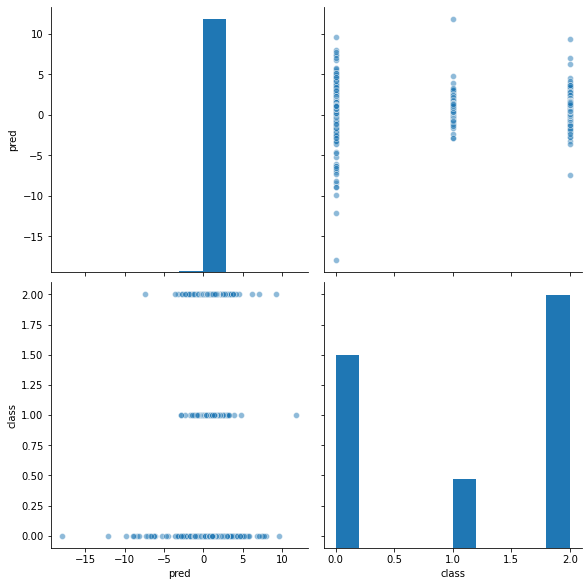

In [52]:
sns.pairplot(data=train, vars=[pred_col, target_col], height=4, plot_kws={'alpha': .5})

# 멱함수 분포 변수 log1p 변환

<AxesSubplot:>

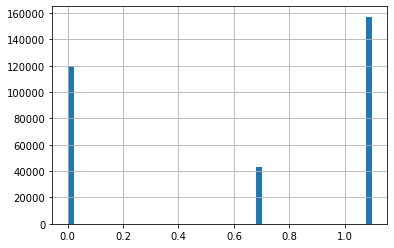

In [59]:
train["class"].apply(np.log1p).hist(bins=50)

In [61]:
model = LinearRegression()
model.fit(train[num_col], np.log1p(train[target_col]))
train[pred_col] = np.expm1(model.predict(train[num_col]))

print(f' RMSE:\t{rmse(train[target_col], train[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(train[target_col], train[pred_col]):12.2f}')

 RMSE:	        1.62
RMLSE:	        0.45


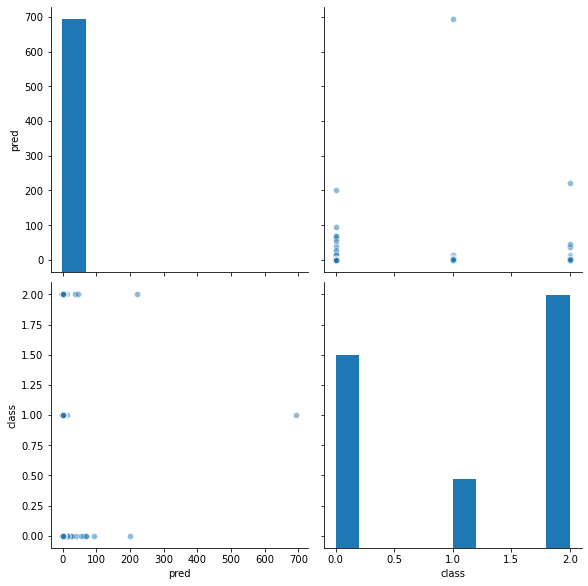

In [62]:
sns.pairplot(data=train, vars=[pred_col, target_col], height=4, plot_kws={'alpha': .5})

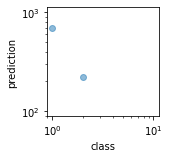

In [64]:
plt.figure(figsize=(2, 2))
plt.scatter(train[target_col], train[pred_col], alpha=.5)
plt.xlabel('class')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')

In [66]:
train[num_col].describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000
mean,19.852429,18.376837,17.735761,17.174226,16.875187,0.058308,19.628874,18.227087,17.615434,17.152347,16.869277,6.332700,6.138816,1.175763,1.176528,1.175131,1.175430,1.176128
std,1.945548,31.110759,1.466242,52.561464,57.146264,0.575457,1.923586,17.786568,1.473020,25.075760,35.436549,8.881129,8.551634,0.116297,0.118065,0.114723,0.115485,0.117156
min,-17.687512,-17555.365606,7.731354,-23955.817764,-23955.817764,-166.048260,-42.837530,-9999.000000,-16.380230,-9999.000000,-9999.000000,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027
25%,18.724150,17.474851,16.877190,16.523876,16.288890,0.000036,18.563598,17.348370,16.787138,16.453048,16.234063,1.000000,1.000000,1.088220,1.088448,1.087763,1.088021,1.088299
50%,19.419439,18.140528,17.525850,17.149736,16.917610,0.047129,19.264635,18.022410,17.443415,17.087370,16.869390,2.000000,2.000000,1.179350,1.179235,1.179375,1.179377,1.179303
75%,20.432092,19.073172,18.428089,18.007435,17.728924,0.094597,20.197603,18.888443,18.291078,17.906960,17.655653,5.000000,5.000000,1.227540,1.225990,1.229236,1.228599,1.226757
max,58.623328,46.338272,72.009662,50.164052,52.612664,62.323343,30.777850,30.613170,31.957200,32.016220,30.781270,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390


# 정규화/스케일링

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [69]:
scaler = StandardScaler()
X = scaler.fit_transform(train[num_col])

lr = LinearRegression()
lr.fit(X, np.log1p(train[target_col]))
train[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(train[target_col], train[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(train[target_col], train[pred_col]):12.2f}')

 RMSE:	        1.62
RMLSE:	        0.45


In [70]:
scaler = MinMaxScaler()
X = scaler.fit_transform(train[num_col])

lr = LinearRegression()
lr.fit(X, np.log1p(train[target_col]))
train[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(train[target_col], train[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(train[target_col], train[pred_col]):12.2f}')

 RMSE:	        1.62
RMLSE:	        0.45


# 2차 다항회귀(Polynomial Regression)

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
poly = PolynomialFeatures(4)
X = poly.fit_transform(train[num_col])
print(X.shape)

(320000, 7315)


In [74]:
lr = LinearRegression()
lr.fit(X, np.log1p(train[target_col]))
train[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(train[target_col], train[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(train[target_col], train[pred_col]):12.2f}')

 RMSE:	   144229.55
RMLSE:	        0.38


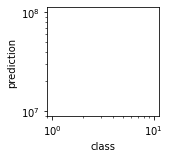

In [78]:
plt.figure(figsize=(2,2))
plt.scatter(train[target_col], train[pred_col], alpha=.1)
plt.xlabel('class')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')